In [3]:
"""
X_train
y_trian
model predict func 
cost func 
gradient func 
gradient_descent func 
"""

'\nX_train\ny_trian\nmodel predict func \ncost func \ngradient func \ngradient_descent func \n'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy
np.set_printoptions(precision=2) 

In [5]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [6]:
def f_wb(x, w, b):
    """
    predict one loop in the matrix
    """
    p=0
    m=len(x)
    f_wb = np.dot(x,w)
    p = p + f_wb
    p = p + b
    return p

In [7]:
x_vec = X_train[0,:]
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

f_wb(x_vec, w_init, b_init)

459.9999976194082

In [8]:
def compute_cost(x, y, w, b):
    """
    j_wb = 1/2m* sum(f_wb(x[i]) - y)**2
    """
    
    n= x.shape[0]
    cost = 0
    
    for i in range(n):
        err = (np.dot(x[i],w)+b) -y[i]
        print(err)
        cost += err**2
    return cost/(2*n)

In [9]:
compute_cost(X_train, y_train, w_init, b_init)

-2.3805918090147316e-06
-1.63059178248659e-06
-1.0105917453984148e-06


1.5578904330213735e-12

In [10]:
def compute_gradient(x, y, w, b):
    """
    dj_dw(j(w,b)) = 1/m * (wx[i]+b -y)* x[i]
    dj_db(j(w,b)) = 1/m * (wx[i]+b -y)
    """
    m,n = x.shape
    d_dw = np.zeros(n,)
    d_db = 0.
    for i in range(m):
        err = (np.dot(x[i],w)+b)-y[i]
        for j in range(n):
            d_dw[j] = d_dw[j]+ err* x[i,j]
            
        d_db = d_db +err
    d_dw = d_dw/m
    d_db = d_db/m
    return d_dw, d_db

In [11]:
compute_gradient(X_train, y_train, w_init, b_init)

(array([-2.73e-03, -6.27e-06, -2.22e-06, -6.92e-05]), -1.6739251122999121e-06)

In [12]:
def gradient_descent(x, y, w_in, b_in, compute_cost, compute_gradient, alpha, iter_num):
    """
    w= w- alpha* dj_dw
    b= b-alpha* dj_db
    """
    J_history= []
    W_hist =np.empty([iter_num,4])
    w =copy.deepcopy(w_in)
    b= b_in
    for i in range(iter_num):
        
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        w = w- alpha * dj_dw
        b = b- alpha * dj_db
        W_hist[i]=w
        if i< 100000:
            J_history.append(compute_cost(x, y, w, b))
        
        
    return w, b, J_history, W_hist     

In [13]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 100000
alpha = 1.0e-8

w_final, b_final, J_hist, W_hist =gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

-449.8391432866667
-225.16053047333332
-173.88340386
-439.9208735361906
-218.4843512765537
-169.86509062385866
-430.23939906125537
-211.96756390447587
-165.94271381820775
-420.7890664492548
-205.6063629274978
-162.11398299099156
-411.5643572610277
-199.3970337694504
-158.37666237397562
-402.5598848084093
-193.33595053850038
-154.72856957718767
-393.770391008718
-187.41957390983973
-151.16757431452868
-385.19074331433944
-181.64444905892526
-147.69159715980894
-376.8159317156171
-176.00720364406135
-144.29860833248412
-368.6410658152963
-170.504545837148
-140.9866265123808
-360.66137197281654
-165.1332624014441
-137.75371768272066
-352.87219051678164
-159.89021681522348
-134.59799400076662
-345.26897302398214
-154.77234744022803
-131.5176126954322
-337.8472796633799
-149.77666573384863
-128.51077499121018
-330.60277660350414
-144.9002545039894
-125.57572505779183
-323.53123348174495
-140.1402662055968
-122.71074898476391
-316.6285209340674
-135.4939212778584
-119.91417378078441
-309.890

-34.357449608676745
54.44726387178406
-5.657569177533134
-34.35743749805499
54.44725763049638
-5.6575887001251886
-34.35742538744381
54.44725138921427
-5.657608222699849
-34.3574132768436
54.447245147937394
-5.657627745257031
-34.35740116625391
54.44723890666609
-5.657647267796818
-34.35738905567507
54.44723266540029
-5.657666790319183
-34.35737694510681
54.447226424139956
-5.657686312824126
-34.3573648345494
54.44722018288496
-5.657705835311646
-34.35735272400274
54.44721394163537
-5.657725357781743
-34.357340613466704
54.4472077003914
-5.657744880234446
-34.357328502941414
54.44720145915272
-5.657764402669699
-34.35731639242687
54.447195217919614
-5.657783925087557
-34.357304281923064
54.44718897669196
-5.657803447487964
-34.35729217142995
54.44718273546965
-5.657822969870949
-34.35728006094769
54.44717649425286
-5.657842492236597
-34.35726795047594
54.44717025304152
-5.657862014584737
-34.357255840015114
54.44716401183564
-5.6578815369154825
-34.35724372956497
54.4471577706351
-5.65

-34.34242857724297
54.43952262604961
-5.68178331580873
-34.34241647992559
54.439516391522375
-5.681802816794345
-34.34240438261884
54.4395101570006
-5.68182231776251
-34.34239228532283
54.43950392248428
-5.681841818713366
-34.342380188037566
54.43949768797347
-5.681861319646771
-34.34236809076299
54.43949145346801
-5.68188082056281
-34.34235599349904
54.439485218968
-5.68190032146137
-34.34234389624589
54.43947898447351
-5.681919822342621
-34.34233179900349
54.43947274998442
-5.681939323206393
-34.342319701771714
54.43946651550078
-5.681958824052799
-34.34230760455074
54.43946028102255
-5.681978324881811
-34.34229550734034
54.43945404654983
-5.681997825693401
-34.34228341014074
54.43944781208256
-5.682017326487625
-34.34227131295194
54.439441577620585
-5.6820368272643975
-34.342259215773765
54.439435343164234
-5.682056328023805
-34.34224711860628
54.43942910871323
-5.6820758287657895
-34.34223502144954
54.439422874267734
-5.682095329490409
-34.34222292430354
54.43941663982764
-5.682114

-34.29912845610119
54.417206786649615
-5.75158267898027
-34.29911639713487
54.41720057161024
-5.7516021176830066
-34.29910433817929
54.4171943565762
-5.751621556368377
-34.299092279234515
54.417188141547626
-5.751640995036439
-34.29908022030031
54.41718192652445
-5.751660433687107
-34.29906816137674
54.41717571150673
-5.751679872320437
-34.29905610246391
54.41716949649441
-5.751699310936431
-34.299044043561764
54.4171632814876
-5.751718749535115
-34.29903198467031
54.417157066486084
-5.751738188116406
-34.29901992578948
54.417150851490135
-5.751757626680359
-34.299007866919396
54.417144636499415
-5.7517770652270315
-34.29899580806
54.41713842151432
-5.75179650375631
-34.29898374921129
54.41713220653452
-5.751815942268223
-34.29897169037315
54.417125991560226
-5.751835380762856
-34.298959631545756
54.417119776591335
-5.751854819240066
-34.298947572729105
54.41711356162784
-5.751874257699939
-34.29893551392314
54.417107346669866
-5.751893696142503
-34.29892345512775
54.417101131717175
-5

-34.27934201616688
54.4070090002553
-5.783477671303984
-34.27932997472544
54.407002794120956
-5.783497081546187
-34.27931793329475
54.40699658799184
-5.783516491771081
-34.279305891874685
54.406990381868354
-5.78353590197861
-34.27929385046525
54.40698417575021
-5.783555312168858
-34.279281809066504
54.40697796963747
-5.78357472234174
-34.279269767678386
54.40697176353024
-5.783594132497342
-34.2792577263009
54.40696555742841
-5.783613542635607
-34.27924568493421
54.406959351331864
-5.783632952756534
-34.279233643578095
54.406953145240834
-5.7836523628602095
-34.279221602232724
54.40694693915526
-5.783671772946491
-34.27920956089798
54.406940733074975
-5.783691183015492
-34.27919751957381
54.4069345270002
-5.7837105930671555
-34.2791854782605
54.40692832093083
-5.78373000310151
-34.279173436957706
54.40692211486686
-5.783749413118585
-34.2791613956656
54.406915908808344
-5.783768823118265
-34.27914935438412
54.406909702755286
-5.783788233100637
-34.27913731311338
54.40690349670763
-5.7

-34.23246138800141
54.3828462320202
-5.859046081616299
-34.23244938808165
54.382840046984654
-5.859065424426717
-34.23243738817246
54.38283386195445
-5.859084767219883
-34.23242538827401
54.38282767692965
-5.859104109995741
-34.23241338838619
54.382821491910306
-5.859123452754432
-34.23240138850895
54.38281530689636
-5.8591427954958135
-34.23238938864239
54.38280912188776
-5.8591621382199435
-34.232377388786404
54.3828029368845
-5.8591814809268215
-34.23236538894105
54.38279675188676
-5.859200823616391
-34.23235338910638
54.382790566894414
-5.859220166288765
-34.2323413892824
54.382784381907356
-5.859239508943858
-34.23232938946893
54.38277819692581
-5.8592588515816715
-34.23231738966609
54.382772011949555
-5.859278194202233
-34.232305389873886
54.38276582697887
-5.859297536805542
-34.23229339009231
54.38275964201341
-5.859316879391599
-34.23228139032142
54.38275345705347
-5.859336221960405
-34.232269390561214
54.38274727209881
-5.859355564511958
-34.23225739081147
54.38274108714967
-5

54.37259268179554
-5.891112077601889
-34.21255614868767
54.37258650571289
-5.891131391798723
-34.212544166397606
54.37258032963564
-5.891150705978333
-34.21253218411823
54.37257415356379
-5.891170020140663
-34.21252020184937
54.37256797749728
-5.8911893342857695
-34.212508219591086
54.37256180143629
-5.891208648413681
-34.2124962373436
54.37255562538064
-5.89122796252434
-34.212484255106574
54.372549449330336
-5.891247276617747
-34.21247227288029
54.37254327328537
-5.891266590693931
-34.212460290664524
54.37253709724587
-5.891285904752891
-34.212448308459386
54.37253092121176
-5.891305218794571
-34.21243632626488
54.37252474518306
-5.891324532819084
-34.212424344080944
54.37251856915975
-5.891343846826288
-34.21241236190764
54.37251239314179
-5.891363160816297
-34.212400379744906
54.372506217129285
-5.891382474789054
-34.21238839759286
54.372500041122066
-5.891401788744645
-34.21237641545139
54.37249386512036
-5.891421102682898
-34.21236443332049
54.37248768912406
-5.891440416603956
-3

54.348116069259675
-5.967653815011033
-34.165069968811224
54.34810991454799
-5.967673060906435
-34.16505802857836
54.34810375984159
-5.96769230678467
-34.165046088356064
54.34809760514065
-5.9677115526457385
-34.16503414814434
54.348091450445054
-5.967730798489555
-34.16502220794325
54.3480852957548
-5.967750044316233
-34.165010267752564
54.34807914107006
-5.967769290125744
-34.16499832757262
54.34807298639055
-5.9677885359181175
-34.16498638740319
54.34806683171638
-5.9678077816932955
-34.16497444724433
54.34806067704773
-5.967827027451278
-34.16496250709599
54.34805452238436
-5.9678462731920945
-34.16495056695834
54.348048367726335
-5.967865518915744
-34.16493862683126
54.34804221307371
-5.967884764622227
-34.16492668671469
54.34803605842649
-5.967904010311514
-34.1649147466087
54.34802990378461
-5.9679232559836635
-34.16490280651334
54.34802374914807
-5.967942501638589
-34.16489086642861
54.34801759451699
-5.967961747276405
-34.16487892635428
54.34801143989131
-5.967980992896997
-34

-34.149055688063584
54.33985513193568
-5.993485582237611
-34.149043762013946
54.3398489844364
-5.99350480508204
-34.149031835974824
54.33984283694258
-5.993524027909331
-34.14901990994639
54.33983668945399
-5.993543250719426
-34.14900798392847
54.3398305419708
-5.993562473512412
-34.14899605792107
54.33982439449301
-5.993581696288203
-34.148984131924294
54.33981824702056
-5.993600919046855
-34.148972205938094
54.339812099553455
-5.993620141788341
-34.14896027996235
54.33980595209175
-5.993639364512688
-34.148948353997184
54.33979980463545
-5.9936585872198975
-34.14893642804259
54.33979365718449
-5.99367780990994
-34.14892450209868
54.33978750973887
-5.993697032582816
-34.14891257616523
54.33978136229865
-5.993716255238525
-34.14890065024241
54.33977521486378
-5.993735477877152
-34.14888872433005
54.33976906743425
-5.993754700498556
-34.14887679842832
54.33976292001017
-5.99377392310285
-34.14886487253722
54.33975677259133
-5.993793145689949
-34.148852946656575
54.339750625178
-5.993812

54.31571234316465
-6.068975703408398
-34.10220834237833
54.315706216743024
-6.068994858888715
-34.102196457819275
54.31570009032674
-6.069014014351922
-34.10218457327085
54.315693963915805
-6.069033169798047
-34.10217268873282
54.31568783751027
-6.069052325227091
-34.10216080420531
54.31568171110996
-6.069071480639025
-34.102148919688375
54.31567558471511
-6.069090636033849
-34.1021370351819
54.3156694583256
-6.06910979141162
-34.10212515068605
54.31566333194144
-6.069128946772253
-34.10211326620066
54.31565720556256
-6.069148102115832
-34.102101381725845
54.31565107918908
-6.069167257442302
-34.10208949726143
54.315644952821
-6.069186412751662
-34.10207761280765
54.315638826458155
-6.069205568043941
-34.10206572836444
54.31563270010071
-6.0692247233191665
-34.102053843931685
54.3156265737486
-6.069243878577254
-34.10204195950945
54.3156204474019
-6.069263033818231
-34.10203007509773
54.315614321060536
-6.0692821890421556
-34.10201819069658
54.31560819472446
-6.069301344248942
-34.1020

54.3073853503729
-6.095011366432857
-34.08605506501368
54.30737923122075
-6.095030498679904
-34.08604319476069
54.307373112074
-6.095049630909841
-34.086031324518274
54.30736699293249
-6.095068763122725
-34.08601945428626
54.307360873796426
-6.0950878953185565
-34.08600758406487
54.30735475466565
-6.095107027497249
-34.08599571385395
54.30734863554022
-6.095126159658946
-34.085983843653594
54.30734251642008
-6.095145291803533
-34.0859719734637
54.307336397305335
-6.095164423931038
-34.085960103284265
54.30733027819599
-6.095183556041491
-34.085948233115346
54.307324159091934
-6.0952026881348615
-34.08593636295706
54.30731803999328
-6.095221820211151
-34.08592449280917
54.307311920899906
-6.095240952270387
-34.0859126226718
54.30730580181182
-6.095260084312571
-34.08590075254506
54.30729968272914
-6.095279216337616
-34.085888882428776
54.307293563651854
-6.095298348345608
-34.08587701232301
54.3072874445798
-6.0953174803365755
-34.0858651422277
54.307281325513145
-6.095336612310433
-34.

54.279439952221196
-6.182382058006823
-34.03184668232052
54.279433857464255
-6.182401112286726
-34.03183486007646
54.279427762712714
-6.182420166549605
-34.0318230378428
54.27942166796652
-6.182439220795487
-34.031811215619655
54.279415573225606
-6.182458275024345
-34.031799393407084
54.27940947849004
-6.182477329236207
-34.031787571204916
54.2794033837597
-6.182496383431101
-34.03177574901321
54.279397289034705
-6.182515437608998
-34.03176392683196
54.27939119431511
-6.182534491769843
-34.03175210466122
54.279385099600745
-6.18255354591372
-34.03174028250095
54.27937900489178
-6.182572600040544
-34.03172846035113
54.2793729101881
-6.182591654150428
-34.03171663821183
54.27936681548971
-6.182610708243288
-34.03170481608288
54.27936072079672
-6.182629762319124
-34.0316929939645
54.27935462610901
-6.182648816377963
-34.03168117185652
54.27934853142665
-6.1826678704197775
-34.031669349759056
54.279342436749516
-6.182686924444596
-34.03165752767194
54.27933634207784
-6.1827059784524465
-34

-34.022439488122245
54.27458411821948
-6.197562926697145
-34.02242767420944
54.27457802770135
-6.197581967429926
-34.02241586030709
54.27457193718857
-6.197601008145739
-34.02240404641532
54.27456584668107
-6.197620048844527
-34.022392232533946
54.27455975617892
-6.197639089526376
-34.02238041866292
54.274553665682106
-6.197658130191201
-34.02236860480241
54.27454757519058
-6.197677170839057
-34.02235679095247
54.27454148470434
-6.197696211469889
-34.02234497711288
54.27453539422345
-6.1977152520837535
-34.022333163283804
54.2745293037479
-6.197734292680593
-34.022321349465244
54.27452321327763
-6.197753333260465
-34.02230953565703
54.27451712281271
-6.197772373823369
-34.02229772185933
54.274511032353075
-6.197791414369249
-34.02228590807215
54.274504941898726
-6.197810454898189
-34.02227409429531
54.27449885144978
-6.197829495410076
-34.02226228052899
54.27449276100606
-6.1978485359049955
-34.02225046677319
54.27448667056774
-6.197867576382947
-34.022238653027784
54.27448058013471
-6

-33.969888638526186
54.247491403435276
-6.282258965737583
-33.96987687115336
54.24748533656606
-6.282277930888796
-33.96986510379105
54.24747926970207
-6.282296896023098
-33.969853336439144
54.24747320284342
-6.282315861140461
-33.96984156909764
54.24746713599001
-6.282334826240884
-33.96982980176659
54.24746106914188
-6.282353791324454
-33.96981803444601
54.24745500229909
-6.282372756391027
-33.969806267135766
54.24744893546159
-6.282391721440689
-33.96979449983593
54.24744286862938
-6.28241068647344
-33.96978273254655
54.24743680180251
-6.282429651489309
-33.96977096526757
54.24743073498087
-6.2824486164881534
-33.96975919799905
54.24742466816457
-6.282467581470144
-33.969747430740824
54.24741860135356
-6.282486546435194
-33.96973566349317
54.247412534547834
-6.282505511383306
-33.969723896255914
54.24740646774734
-6.2825244763145065
-33.96971212902906
54.2474004009523
-6.282543441228796
-33.96970036181261
54.24739433416238
-6.282562406126175
-33.96968859460662
54.2473882673778
-6.28

-33.91126383041211
54.217265422810044
-6.376741357221789
-33.911252114957676
54.217259382322595
-6.376760238057017
-33.911240399513645
54.21725334184032
-6.376779118875362
-33.91122868407996
54.217247301363386
-6.3767979996768815
-33.911216968656674
54.21724126089168
-6.376816880461547
-33.911205253243736
54.217235220425266
-6.3768357612293585
-33.9111935378412
54.21722917996419
-6.376854641980287
-33.91118182244895
54.217223139508235
-6.3768735227144475
-33.91117010706722
54.217217099057734
-6.376892403431697
-33.91115839169578
54.217211058612406
-6.376911284132092
-33.91114667633474
54.21720501817225
-6.376930164815661
-33.91113496098404
54.21719897773761
-6.376949045482377
-33.911123245643694
54.21719293730803
-6.376967926132238
-33.91111153031375
54.217186896883845
-6.376986806765245
-33.91109981499426
54.217180856464836
-6.377005687381427
-33.91108809968506
54.21717481605111
-6.3770245679807545
-33.91107638438632
54.217168775642676
-6.3770434485631995
-33.911064669097755
54.217162

-33.851882966946164
54.186647656692
-6.472438958924926
-33.85187130407866
54.18664164292602
-6.4724577543583734
-33.85185964122144
54.186635629165266
-6.472476549775024
-33.85184797837462
54.1866296154098
-6.472495345174934
-33.851836315538094
54.18662360165956
-6.472514140558019
-33.85182465271191
54.186617587914554
-6.472532935924363
-33.85181298989596
54.18661157417483
-6.47255173127391
-33.85180132709041
54.18660556044034
-6.472570526606717
-33.85178966429521
54.18659954671108
-6.472589321922726
-33.8517780015103
54.186593532987104
-6.4726081172219665
-33.851766338735786
54.1865875192683
-6.47262691250441
-33.85175467597145
54.18658150555484
-6.472645707770113
-33.85174301321763
54.1865754918465
-6.472664503019075
-33.85173135047404
54.1865694781435
-6.472683298251212
-33.851719687740854
54.18656346444567
-6.47270209346658
-33.8517080250179
54.186557450753185
-6.4727208886651795
-33.85169636230535
54.18655143706593
-6.47273968384701
-33.851684699603084
54.186545423383905
-6.4727584

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



-33.31396035269563
53.90919207421388
-7.339193972100645
-33.313949166158636
53.90918630249064
-7.339211993968036
-33.31393797963142
53.90918053077246
-7.339230015819254
-33.31392679311426
53.90917475905928
-7.339248037654386
-33.31391560660683
53.909168987351165
-7.339266059473488
-33.31390442010951
53.90916321564799
-7.339284081276503
-33.31389323362197
53.90915744394994
-7.339302103063403
-33.313882047144375
53.90915167225688
-7.339320124834273
-33.31387086067656
53.90914590056889
-7.339338146588972
-33.313859674218804
53.90914012888595
-7.33935616832764
-33.31384848777088
53.90913435720796
-7.339374190050194
-33.31383730133297
53.90912858553503
-7.339392211756717
-33.31382611490483
53.909122813867214
-7.339410233447126
-33.313814928486636
53.90911704220434
-7.339428255121419
-33.31380374207828
53.90911127054659
-7.339446276779626
-33.31379255567998
53.90910549889372
-7.339464298421802
-33.31378136929146
53.90909972724597
-7.339482320047836
-33.31377018291295
53.909093955603225
-7.33

-33.24625131185542
53.874255994192026
-7.448273029800305
-33.246240185268505
53.87425025293197
-7.448290954307936
-33.24622905869154
53.874244511676864
-7.4483088787995655
-33.24621793212441
53.87423877042676
-7.448326803275137
-33.246206805567056
53.87423302918165
-7.448344727734735
-33.24619567901959
53.874227287941665
-7.448362652178332
-33.246184552481964
53.87422154670651
-7.448380576605956
-33.24617342595417
53.874215805476524
-7.448398501017579
-33.24616229943621
53.874210064251486
-7.4484164254132
-33.246151172928194
53.87420432303145
-7.448434349792819
-33.246140046430014
53.874198581816415
-7.448452274156409
-33.24612891994167
53.87419284060633
-7.4484701985040545
-33.246117793463156
53.8741870994013
-7.44848812283567
-33.246106666994535
53.87418135820127
-7.448506047151312
-33.24609554053575
53.87417561700619
-7.448523971450925
-33.246084414086795
53.87416987581622
-7.448541895734536
-33.24607328764773
53.874164134631144
-7.4485598200022025
-33.24606216121856
53.874158393451

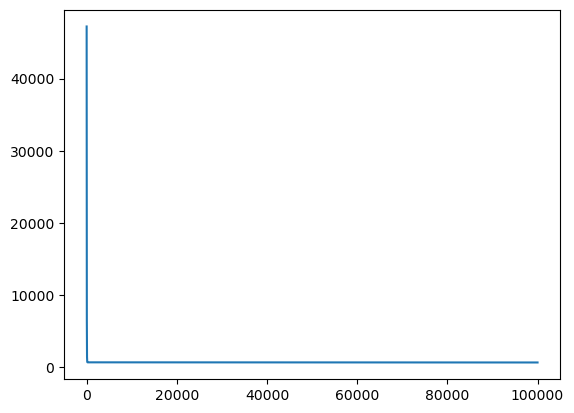

In [14]:
plt.plot(np.arange(1,100001), J_hist)
plt.show()

In [15]:
W_hist[:00,1]

array([], dtype=float64)

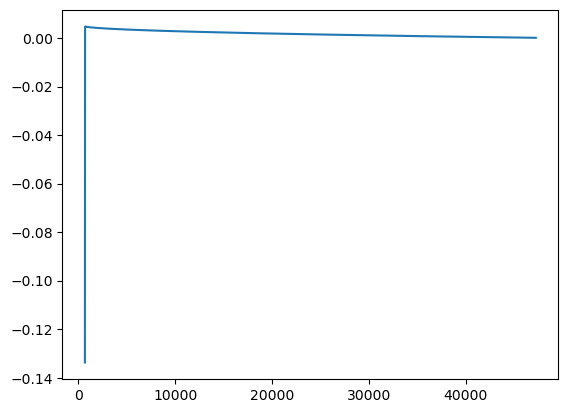

In [16]:
plt.plot(J_hist, W_hist[:,3])
plt.show()